# CPPI DEMO

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

C:\Users\dimitri\workspaces\opensource\finance-toolbox


In [3]:
from fintools import *

ind_returns = load_industry_returns()
tmi_returns = get_total_market_index_returns()

tmi_returns.tail()

2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, dtype: float64

In [4]:
# Use a portfolio of risk assets
risky_returns = ind_returns['2000':][['Steel','Fin','Beer']]

# construct a safe asset of constant return rate
safe_returns = pd.DataFrame().reindex_like(risky_returns)
safe_returns[:] = 0.03/12

### Steps in CPPI algorithm

1. Compute Cushion - Asset Value minus Floor Value
2. Compute an Allocation to Safe and Risky Assets
3. Recompute the Asset Valued based on the returns


In [27]:
#Note that since the risky returns is a data frame with 3 columns, 
# we are backtesting three different portfolios at once

result = backtest_cppi(risky_returns, safe_returns)
wealth = result['wealth']
risky_wealth = result['risky_wealth']
floor = result['floor']

<AxesSubplot:title={'center':'Wealth Index for Risky Assets'}>

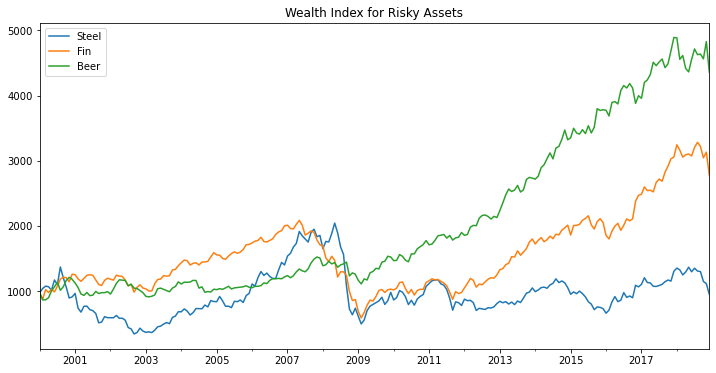

In [7]:
risky_wealth.plot(figsize=(12,6), title='Wealth Index for Risky Assets')

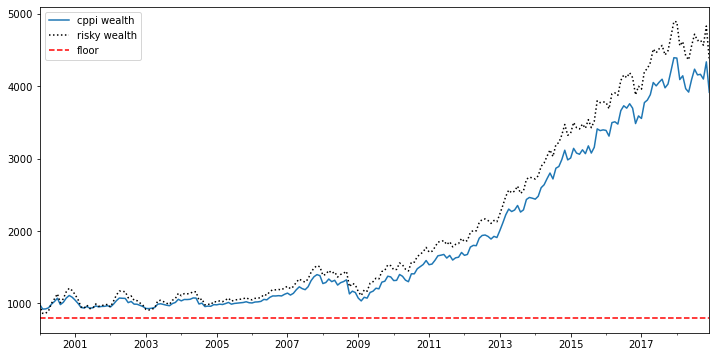

In [14]:
def plot_industry(ind):
    ax = wealth[ind].plot(figsize=(12,6), label='cppi wealth', legend=True)
    risky_wealth[ind].plot(ax=ax, style='k:', label='risky wealth', legend=True)
    floor[ind].plot(color='r', linestyle='--', label='floor', legend=True)
    
plot_industry('Beer')

Note that after some time, the floor is too far below and becomes irrlevant

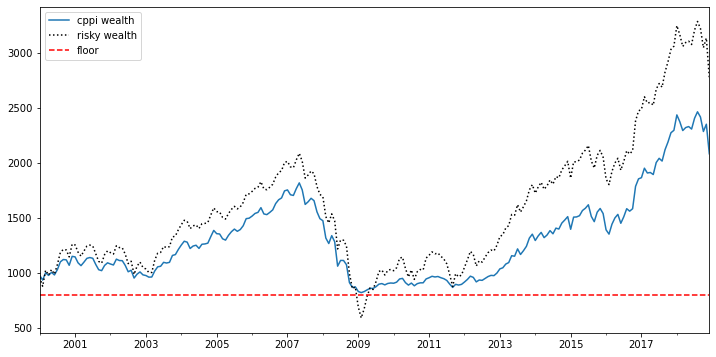

In [16]:
plot_industry('Fin')

Note that in this case the floor helped a little

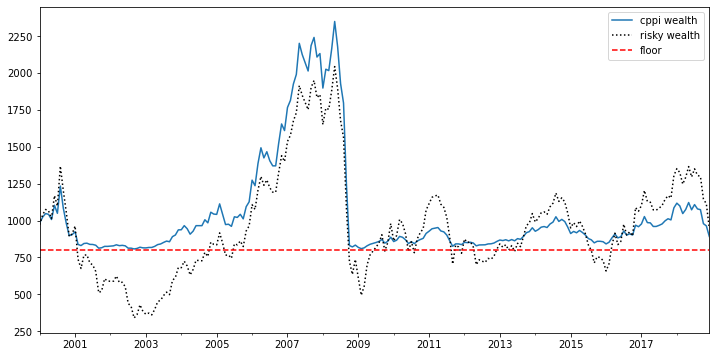

In [17]:
plot_industry('Steel')

In this case, the floor saved us!

<AxesSubplot:title={'center':'Allocation to Risky assets'}>

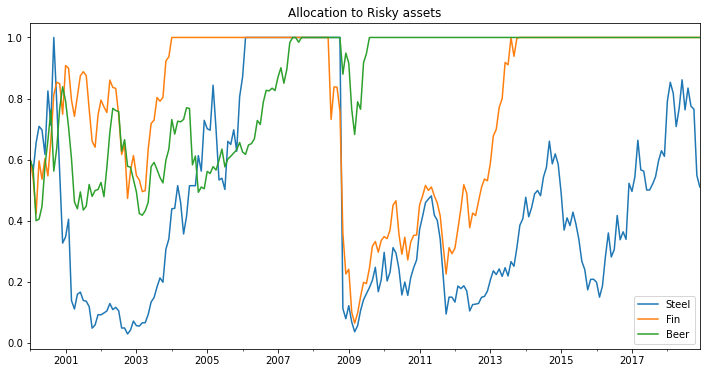

In [15]:
result['risky_allocation'].plot(figsize=(12,6), title='Allocation to Risky assets')

In [20]:
risky_return = risky_wealth.pct_change().dropna()
collect_metrics(risky_return)


,compound_return,annualized_return,annualized_volatility,skewness,excess_kurtosis,cornish_fisher_var,historic_var,conditional_var,sharpe_ratio,max_drawdown
Steel,-0.024680,-0.001320,0.312973,-0.332534,1.184921,0.150320,0.14124,0.208117,-0.004218,-0.758017
Fin,1.902214,0.057941,0.192986,-0.547253,2.087302,0.091091,0.09087,0.132175,0.300234,-0.718465
Beer,3.463108,0.082286,0.139058,-0.505715,1.234881,0.062994,0.06130,0.091442,0.591738,-0.271368


In [21]:
# with cppi, drawdowns are not as extreme
ccpi_return = wealth.pct_change().dropna()
collect_metrics(ccpi_return)

,compound_return,annualized_return,annualized_volatility,skewness,excess_kurtosis,cornish_fisher_var,historic_var,conditional_var,sharpe_ratio,max_drawdown
Steel,-0.093350,-0.005167,0.174180,-2.008439,14.452894,0.091648,0.068080,0.130153,-0.029666,-0.655198
Fin,1.134403,0.040894,0.131678,-0.952812,3.146613,0.065462,0.053808,0.091621,0.310563,-0.549673
Beer,2.965506,0.075544,0.115462,-0.673710,1.827194,0.052878,0.049275,0.074908,0.654275,-0.259582


### CPPI with drawdown parameter

In [26]:
btr = backtest_cppi(ind_returns['2007':][['Steel','Fin','Beer']], drawdown=0.25)

<AxesSubplot:>

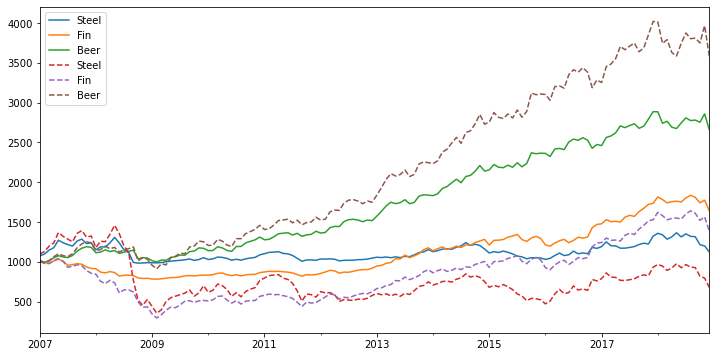

In [23]:
ax = btr['wealth'].plot(figsize=(12,6))
btr['risky_wealth'].plot(ax=ax, style='--')

In [24]:
collect_metrics(btr['risky_wealth'].pct_change().dropna())


,compound_return,annualized_return,annualized_volatility,skewness,excess_kurtosis,cornish_fisher_var,historic_var,conditional_var,sharpe_ratio,max_drawdown
Steel,-0.382600,-0.039660,0.306407,-0.464841,1.889933,0.152097,0.13198,0.203837,-0.129435,-0.758017
Fin,0.379477,0.027364,0.212204,-0.702592,1.722715,0.105619,0.10610,0.149862,0.128951,-0.718465
Beer,2.526470,0.111554,0.127971,-0.677929,1.753250,0.056421,0.04687,0.077388,0.871714,-0.271368


In [25]:
collect_metrics(btr['wealth'].pct_change().dropna())

,compound_return,annualized_return,annualized_volatility,skewness,excess_kurtosis,cornish_fisher_var,historic_var,conditional_var,sharpe_ratio,max_drawdown
Steel,0.046034,0.003784,0.097073,-0.445778,2.343283,0.047302,0.043444,0.066991,0.038979,-0.248059
Fin,0.632294,0.041975,0.085028,-0.358939,1.238406,0.038300,0.038201,0.054111,0.493656,-0.243626
Beer,1.625563,0.084375,0.086263,-0.752023,1.671059,0.037888,0.031027,0.051189,0.978113,-0.161186
